# Tutorial Basico Pandas

Nesse tutorial vamos aprender funções basicas do pandas trabalhando com um conjunto de dados sobre os pokemons disponivel no site Kaggle (https://www.kaggle.com/abcsds/pokemon)

Conteudo :
- Leitura de arquivos
- Descrição Estatística 
- Indexação dos elementos
- Reorganizando Dados
- Filtrando dados
- Reagrupando dados
- Salvando dataframe

Material auxiliar:
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

#### Import pandas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Criação de dados

In [0]:
s = pd.Series([1, 3, 5, None, 6, 8]) # Cria uma serie de dados
print(s)

dates = pd.date_range('20200401', periods=6)
dataframe = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(dataframe)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
                   A         B         C         D
2020-04-01  0.340295  0.186009  1.161085 -0.167967
2020-04-02  2.363735 -0.112192  1.169762  0.435421
2020-04-03 -0.474634  0.880862 -0.132332  0.497344
2020-04-04 -0.296613  0.800001 -0.458305  1.314203
2020-04-05  1.264057 -0.639840  0.051300 -1.432988
2020-04-06  0.734303 -0.592374 -0.644212 -1.692580


## Leitura de arquivos

A biblioteca pandas permite a criação da estrutura de dados utilizando diferentes formartos dentre eles:

Formatos:
- CSV : Comma-separated values (Arquivo separado por virgulas)
- txt : Arquivo de texto (Precisa definir um separador)
- xlsx : Formato utilizado pelo excel

Neste arquivo vamos nos concentrar no formato mais utilizado csv.
A seguir trabalharemos com o conjuntos de dados dos pokemons

In [2]:
df = pd.read_csv('pokemon_data.csv',index_col=False) # Leitura do arquivo formato csv
#df = pd.read_excel('pokemon_data.xlsx') # leitura arquivo em formato xlsx
#df = pd.read_csv('pokemon_data.txt', delimiter='\t') # leitura arquivo txt
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


###### Visualizar os dados


In [0]:
df.head(3) # Apresenta apenas os 3 primeiros itens

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [0]:
df.tail(3) # Apresenta apenas os 3 ultimos itens

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


###### Apresentando intervalos 

In [0]:
df[5:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


## Descrição Estatística 

Podemos gerar um relatorio estatístico basico apartir da função describe.

In [0]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Podemos gerar um histograma sobre qualquer coluna do conjunto de dados

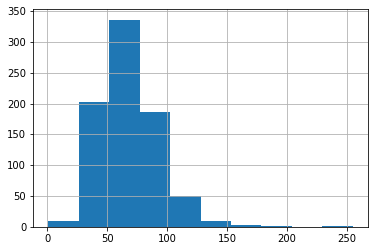

In [0]:
df['HP'].hist()

## Indexação dos elementos

Existem diversos formas de realizar a leitura da estrutura de dados aconselhamos verificar a documentação para maiores informações

###### Selecionando uma ou mais colunas

In [0]:
df['Name'] 
#df.Name

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

In [0]:
df[['Name','HP']]

,Name,HP
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,VenusaurMega Venusaur,80
4,Charmander,39
...,...,...
795,Diancie,50
796,DiancieMega Diancie,50
797,HoopaHoopa Confined,80
798,HoopaHoopa Unbound,80


###### Leitura apartir de uma posição específica (Linha, Coluna)

In [0]:
df.iloc[2,1]

'Venusaur'

In [0]:
df.loc[df['Type 1'] == 'Fire'][:10] # Selecionando os 10 primeiros pokemons do elemento fogo

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
42,37,Vulpix,Fire,NaN,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,50,85,55,65,65,90,1,False


###### Iterando o dataframe

In [0]:
#for index, row in df.iterrows():
#     print(index, row['Name'])

## Reorganizando Dados

In [0]:
# Apresentar em ordem decrecente os pokemons com base no seu ataque

df.sort_values('Attack',ascending=False)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False


###### Podemos Criar novas colunas por atribuição

In [0]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


###### Para deletar colunas de forma analoga é preciso reatribuir


In [0]:
df = df.drop(columns=['Total'])
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


## Filtrando dados

In [0]:
#Apresentar Os pokemons Lendarios
df.loc[df['Legendary'] == True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [0]:
#Apresentar os pokemons com HP superior a 100
df[df['HP'] > 100]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
44,39,Jigglypuff,Normal,Fairy,115,45,20,45,25,20,1,False
45,40,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False
96,89,Muk,Poison,NaN,105,105,75,65,100,50,1,False
120,112,Rhydon,Ground,Rock,105,130,120,45,45,40,1,False
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
753,683,Aromatisse,Fairy,NaN,101,72,72,99,89,29,6,False
769,699,Aurorus,Rock,Ice,123,77,72,99,92,58,6,False
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True


In [0]:
# Selecionar pokemons do tipo Grass e Poison com Hp maior que 70
df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)] # & operador and | operador or

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
50,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False
77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
652,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False


In [0]:
#Encontrar os pokemons que contem forma Mega
df.loc[df['Name'].str.contains('Mega')] # ~ simbolo para negação

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,105,125,100,60,100,100,1,False


## Reagrupando dados

In [0]:
#Reagrupar os pokemons pelo seu tipo realizando a media entre cada elemento

df.groupby(['Type 1']).mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,334.492754,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [0]:
# Quantos pokemonks de cada tipo 
df.groupby(['Type 1']).count()['#']

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: #, dtype: int64

## Salvando dataframe

In [0]:
# df.to_csv('modified.csv', index=False)
#df.to_excel('modified.xlsx', index=False)